___

<center> <h1> NETWORK INTRUSION DETECTION SYSTEM

___

### BUSINESS CONTEXT

- With the enormous growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly more important. All the computer systems suffer from security vulnerabilities which are both technically difficult and economically costly to be solved by the manufacturers. Therefore, the role of Intrusion Detection Systems (IDSs), as special-purpose devices to detect anomalies and attacks in the network, is becoming more important. <BR>
<br>
    
- The research in the intrusion detection field has been mostly focused on anomaly-based and misusebased detection techniques for a long time. While misuse-based detection is generally favored in commercial products due to its predictability and high accuracy, in academic research anomaly detection is typically conceived as a more powerful method due to its theoretical potential for addressing novel attacks.<BR>
<br>
    
- Conducting a thorough analysis of the recent research trend in anomaly detection, one will encounter several machine learning methods reported to have a very high detection rate of 98% while keeping the false alarm rate at 1%. However, when we look at the state of the art IDS solutions and commercial tools, there is no evidence of using anomaly detection approaches, and practitioners still think that it is an immature technology. To find the reason of this contrast, lots of research was done done in anomaly detection and considered various aspects such as learning and detection approaches, training data sets, testing data sets, and evaluation methods.

## BUSINESS PROBLEM:

<large> 
The task to build network intrusion detection system to detect anamolies and attacks in the network. There are two problems: 
1. **Binomial Classification:**  Activity is normal or attack
2. **Multinomial classification:**  Activity is normal or DOS or PROBE or R2L or U2R

### DATA AVAILABILITY:

This data is KDDCUP’99 data set, which is widely used as one of the few publicly available data sets for network-based anomaly detection systems. <BR>
For more about data: http://www.unb.ca/cic/datasets/nsl.html

___

#### IMPORTING REQUIRED LIBRARIES

In [91]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# parameters
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

# warnings
import warnings
warnings.filterwarnings('ignore')

#### IMPORTING THE DATASET

In [92]:
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
                 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 
                 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack','last_flag']

train_df = pd.read_csv('Train.txt', sep = ',', header = None, names = column_names)  # Training dataset

test_df = pd.read_csv('Test.txt', sep = ',', header = None, names = column_names)  # Testing dataset

___

## DATA AUDIT

In [93]:
# first five rows of the training dataset
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [94]:
# last five rows of the training dataset
train_df.tail() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [95]:
# shape of the training dataset
train_df.shape  

(125973, 43)

In [96]:
# columns present in the training dataset
train_df.columns  

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [97]:
# a concise summary of the training dataset
train_df.info(null_counts=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       int64
protocol_type                  object
service                        object
flag                           object
src_bytes                      int64
dst_bytes                      int64
land                           int64
wrong_fragment                 int64
urgent                         int64
hot                            int64
num_failed_logins              int64
logged_in                      int64
num_compromised                int64
root_shell                     int64
su_attempted                   int64
num_root                       int64
num_file_creations             int64
num_shells                     int64
num_access_files               int64
num_outbound_cmds              int64
is_host_login                  int64
is_guest_login                 int64
count                          int64
srv_count                      int6

>The training dataset has **125973 observations** and total **43 columns**. 15 of the columns are floats, 24 are integers and 4 are objects.

In [98]:
# number of missing values in each variable of training dataset
train_df.isna().sum()  

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [99]:
# total number of missing values in the training dataset
train_df.isna().sum().sum() 

0

> There are **no missing values** in the training dataset.

In [100]:
# splitting continous and categorical variables to get better clarity of the training dataset.
train_df_conti_vars = train_df.loc[:, (train_df.dtypes == 'float64') | (train_df.dtypes == 'int64') | (train_df.dtypes == 'float32') | (train_df.dtypes == 'int32')]
train_df_cat_vars = train_df.loc[:, train_df.dtypes == 'object']

In [101]:
# first five rows of the continous variables of training dataset
train_df_conti_vars.head()  

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [102]:
# first five rows of the categorical variables of training dataset
train_df_cat_vars.head()  

,protocol_type,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal


In [103]:
# Creating a UDF to get the summary of the continous variables for data exploration and analysis
def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), (x.isnull().sum()/x.isnull().count()*100), x.sum(), x.min(), 
                      x.mean(), x.median(), x.std(), x.var(), x.quantile(.01), x.quantile(.05), x.quantile(.10), 
                      x.quantile(.25), x.quantile(.50), x.quantile(.75), x.quantile(.90), x.quantile(.95), 
                      x.quantile(.99), x.max()], 
                      index = ['N', 'NMISS', '%MISS', 'SUM', 'MIN', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'P1', 'P5', 
                               'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

In [104]:
# a brief summary of the continous variables
train_df_conti_vars.apply(continous_var_summary).T.round()  

,N,NMISS,%MISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,0.0,3.617247e+07,0.0,287.0,0.0,2605.0,6.783500e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,9591.0,4.290800e+04
src_bytes,125973.0,0.0,0.0,5.740179e+09,0.0,45567.0,44.0,5870331.0,3.446079e+13,0.0,0.0,0.0,0.0,44.0,276.0,848.0,1480.0,54540.0,1.379964e+09
dst_bytes,125973.0,0.0,0.0,2.491634e+09,0.0,19779.0,0.0,4021269.0,1.617061e+13,0.0,0.0,0.0,0.0,0.0,516.0,3376.0,8314.0,25519.0,1.309937e+09
land,125973.0,0.0,0.0,2.500000e+01,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00
wrong_fragment,125973.0,0.0,0.0,2.858000e+03,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+00
urgent,125973.0,0.0,0.0,1.400000e+01,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+00
hot,125973.0,0.0,0.0,2.575000e+04,0.0,0.0,0.0,2.0,5.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.700000e+01
num_failed_logins,125973.0,0.0,0.0,1.540000e+02,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000e+00
logged_in,125973.0,0.0,0.0,4.985200e+04,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000e+00
num_compromised,125973.0,0.0,0.0,3.517800e+04,0.0,0.0,0.0,24.0,5.730000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.479000e+03


In [105]:
# Creating a UDF to get the summary of categorical varibles for data exploration and analysis
def categorical_var_summary(x):
    Mode = x.value_counts().reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1],(Mode.iloc[0, 1]*100)/x.count()], 
                      index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERC'])

In [106]:
# a brief summary of the categorical variables
train_df_cat_vars.apply(categorical_var_summary).T.round()  

,N,NMISS,MODE,FREQ,PERC
protocol_type,125973,0,tcp,102689,81.5167
service,125973,0,http,40338,32.0211
flag,125973,0,SF,74945,59.4929
attack,125973,0,normal,67343,53.4583


>From the tables above, we can note a few things:<br> 
- The dependent variable or the target variable is not definied explicitly. 
- So, first of all we need to define the **target variable** i.e. **Activity**.
- Furthermore, we can see that the features have **widely different ranges**, that we will need to convert into roughly the same scale. 
- Certainly, there are **outliers present** in the training dataset. we can spot them through high variance, and high standard deviation and the difference between p99 and Max.
- We need to **convert features into numeric** ones later on, so that the algorithms can process them. 
- We can also spot some more features, that training dataset does not contain any **missing values**.

___

## DATA PREPERATION

- ### DEFINING TARGET VARIABLE

In [107]:
# using 'attack' variable to define the target variable.
train_df_cat_vars['activity'] = train_df_cat_vars['attack'].apply(lambda x: 0 if x == 'normal' else 1)

>For binomial classification, assigning the **target variable** with **0** when the activity is **'normal'** and **1** whenever there is an **attack**.

In [108]:
# the count of observations of each activity
train_df_cat_vars['activity'].value_counts()

0    67343
1    58630
Name: activity, dtype: int64

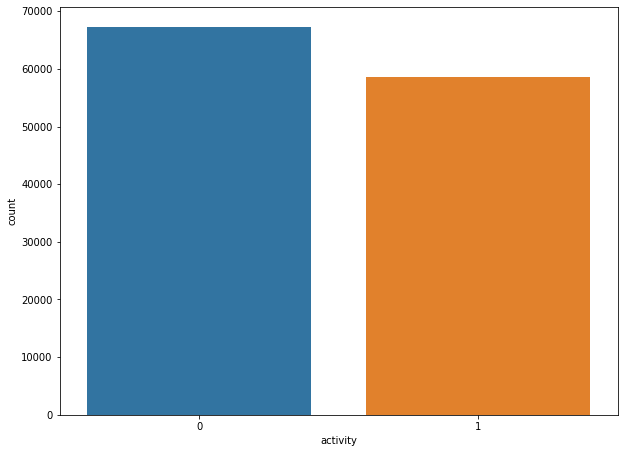

In [109]:
# the graphical representation of the count of observations of each activity using bars.
sns.countplot(train_df_cat_vars['activity'])
plt.show()

> From the above graph we can see that **53%** of activities are **normal** whereas **47%** are of **attack type** in the training dataset.

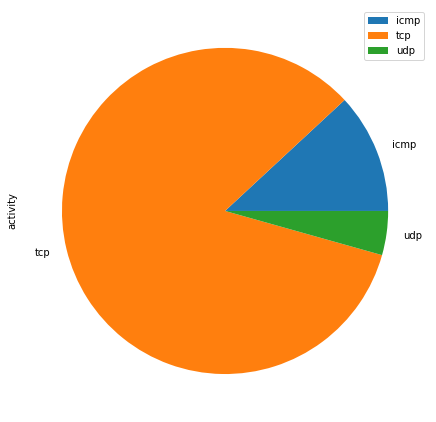

In [110]:
# the graphical representation of the count of observations of each activity by protocol_type.
train_df_cat_vars.groupby('protocol_type')['activity','protocol_type'].sum().plot(kind='pie', subplots=True)
plt.show()

- ### TREATING OUTLIERS

In [111]:
# Clipping Outliers with P3 and P97
train_df_conti_vars= train_df_conti_vars.apply(lambda x: x.clip(lower=x.dropna().quantile(.03),upper=x.quantile(.97)))

In [113]:
train_df_conti_vars.apply(continous_var_summary).T.round()

,N,NMISS,%MISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,0.0,165077.0,0.0,1.0,0.0,6.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,31.0,31.0
src_bytes,125973.0,0.0,0.0,36086547.0,0.0,286.0,44.0,599.0,359267.0,0.0,0.0,0.0,0.0,44.0,276.0,848.0,1480.0,2974.0,2974.0
dst_bytes,125973.0,0.0,0.0,139569087.0,0.0,1108.0,0.0,2624.0,6887793.0,0.0,0.0,0.0,0.0,0.0,516.0,3376.0,8314.0,11715.0,11715.0
land,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wrong_fragment,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
urgent,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hot,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_failed_logins,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
logged_in,125973.0,0.0,0.0,49852.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
num_compromised,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> After multiple iterations clipping outliers with **p3 and p97** seems to be the best choice.

- ### DROPPING VARIABLES HAVING ONLY ZEROS

In [114]:
# Count of non-zeros in each variable
for i in train_df_conti_vars:
    print(i, ':', (np.count_nonzero(train_df_conti_vars[i])))

duration : 10018
src_bytes : 76581
dst_bytes : 58006
land : 0
wrong_fragment : 0
urgent : 0
hot : 0
num_failed_logins : 0
logged_in : 49852
num_compromised : 0
root_shell : 0
su_attempted : 0
num_root : 0
num_file_creations : 0
num_shells : 0
num_access_files : 0
num_outbound_cmds : 0
is_host_login : 0
is_guest_login : 0
count : 125973
srv_count : 125973
serror_rate : 39144
srv_serror_rate : 37219
rerror_rate : 16190
srv_rerror_rate : 16206
same_srv_rate : 125973
diff_srv_rate : 49756
srv_diff_host_rate : 28399
dst_host_count : 125973
dst_host_srv_count : 125973
dst_host_same_srv_rate : 119046
dst_host_diff_srv_rate : 78984
dst_host_same_src_port_rate : 62950
dst_host_srv_diff_host_rate : 39069
dst_host_serror_rate : 44587
dst_host_srv_serror_rate : 40613
dst_host_rerror_rate : 22795
dst_host_srv_rerror_rate : 19357
last_flag : 125973


>Dropping continous variables **having zeros** only because they won't contribute in model building.

In [115]:
del_zero_col = ['land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 
                'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 
                'num_outbound_cmds', 'is_host_login', 'is_guest_login']

train_df_conti_vars = train_df_conti_vars.drop(columns = del_zero_col)

- ### FEATURE SCALING

In [116]:
# standardizing the variables
data = ['dst_bytes', 'src_bytes', 'duration', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'last_flag']
fs_df = train_df_conti_vars.copy()

for scale_cols in data:
    fs_df.loc[(fs_df[scale_cols] <= fs_df[scale_cols].quantile(.25)), scale_cols] = 0
    fs_df.loc[(fs_df[scale_cols] > fs_df[scale_cols].quantile(.25)) & (fs_df[scale_cols] <= fs_df[scale_cols].quantile(.50)), scale_cols] = 1
    fs_df.loc[(fs_df[scale_cols] > fs_df[scale_cols].quantile(.50)) & (fs_df[scale_cols] <= fs_df[scale_cols].quantile(.75)), scale_cols] = 2
    fs_df.loc[(fs_df[scale_cols] > fs_df[scale_cols].quantile(.75)) & (fs_df[scale_cols] <= fs_df[scale_cols].quantile(.95)), scale_cols] = 3
    fs_df.loc[(fs_df[scale_cols] > fs_df[scale_cols].quantile(.95)), scale_cols] = 4
    
train_df_conti_vars = fs_df.copy()

- ### CREATING DUMMY VARIABLES

In [117]:
# Creating a UDF to convert categorical varibles to dummy variables for model building
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [118]:
# Creating dummy variables for training dataset
for c_feature in ['protocol_type', 'flag']:
    train_df_cat_vars[c_feature] = train_df_cat_vars[c_feature].astype('category')
    train_df_cat_vars = create_dummies(train_df_cat_vars, c_feature)

In [119]:
train_df_cat_vars = train_df_cat_vars.drop(['attack', 'service'], axis=1)

In [120]:
# concatinating continous and categorical variables to get the final dataset
train_final = pd.concat([train_df_conti_vars, train_df_cat_vars], axis=1)

In [121]:
train_final.head()

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,3,0.0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,2,0.0,0,1,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0.0,0,2,1,1.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0,2,3.0,1,1,1,0.2,0.2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,2.0,1,2,3,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


- ### CONVERTING FEATURES

In [122]:
# coverting all the features to int data type
for col in train_final:
    train_final[col] = train_final[col].astype(int)

___

## ASSUMPTIONS CHECK

- ### ASSUMPTION OF APPROPRIATE OUTCOME STRUCTURE <br>
    - One of the main assumptions of logistic regression is the appropriate structure of the outcome variable.

In [123]:
train_final.activity.unique()

array([0, 1])

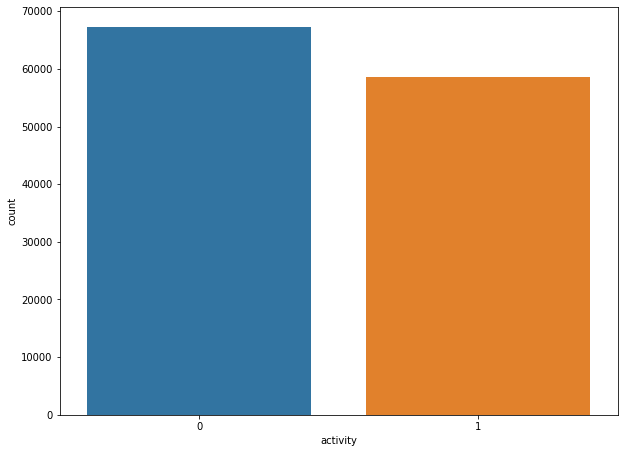

In [124]:
# the graphical representation of the count of observations of each activity using bars.
sns.countplot(train_final['activity'])
plt.show()

> Hence, the dependent variable is binary.

- ### ASSUMPTION OF THE ABSENCE OF MULTICOLLINEARITY <br>
    - Logistic regression requires there to be little or no multicollinearity among the independent variables. This
means that the independent variables should not be too highly correlated with each other.

In [125]:
# computing pairwise correlation of columns
corrm = train_final.corr(method='pearson')

corrm.to_csv('corrm.csv', index=False)
corrm

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
duration,1.000000,0.230055,0.149619,0.112167,-0.311612,-0.311478,-0.176113,-0.178284,0.060103,0.048283,...,-0.085581,-0.007929,0.081103,0.290879,-0.180047,-0.015694,0.016254,0.021484,0.130765,-0.013518
src_bytes,0.230055,1.000000,0.670545,0.762483,-0.486640,-0.052010,-0.641677,-0.649158,-0.325101,-0.355202,...,-0.333086,-0.104837,-0.026004,-0.066762,-0.658250,0.044681,0.024377,0.022606,0.834970,-0.049429
dst_bytes,0.149619,0.670545,1.000000,0.785083,-0.399192,0.013329,-0.525478,-0.531901,-0.280696,-0.303987,...,-0.273863,-0.078467,-0.025038,-0.089875,-0.541302,0.059897,0.012677,0.009664,0.692990,-0.040640
logged_in,0.112167,0.762483,0.785083,1.000000,-0.487019,-0.147705,-0.485208,-0.491636,-0.264727,-0.287214,...,-0.253209,-0.070580,-0.023150,-0.093418,-0.500442,0.052719,0.033628,0.019436,0.641738,-0.037575
count,-0.311612,-0.486640,-0.399192,-0.487019,1.000000,0.518895,0.515062,0.520674,-0.003384,0.074351,...,0.126381,0.056057,0.016658,-0.144118,0.528664,-0.054244,-0.033048,-0.017408,-0.513616,-0.054887
srv_count,-0.311478,-0.052010,0.013329,-0.147705,0.518895,1.000000,0.088461,0.084271,-0.157226,-0.205289,...,-0.147405,-0.018982,-0.026673,-0.161133,0.094110,-0.044839,-0.024375,-0.011760,0.063427,-0.052713
serror_rate,-0.176113,-0.641677,-0.525478,-0.485208,0.515062,0.088461,1.000000,0.980512,-0.206948,-0.224034,...,-0.191922,-0.068730,-0.017547,-0.085863,0.967226,0.045468,0.031025,0.008675,-0.743254,0.073391
srv_serror_rate,-0.178284,-0.649158,-0.531901,-0.491636,0.520674,0.084271,0.980512,1.000000,-0.208748,-0.225982,...,-0.193591,-0.069327,-0.017699,-0.086610,0.978286,0.038604,0.009974,0.006690,-0.749827,0.073513
rerror_rate,0.060103,-0.325101,-0.280696,-0.264727,-0.003384,-0.157226,-0.206948,-0.208748,1.000000,0.915603,...,0.728856,0.316718,0.003185,0.389132,-0.208652,-0.018187,-0.010718,-0.006655,-0.408718,-0.015665
srv_rerror_rate,0.048283,-0.355202,-0.303987,-0.287214,0.074351,-0.205289,-0.224034,-0.225982,0.915603,1.000000,...,0.834969,0.292536,0.001618,0.367470,-0.225879,-0.019689,-0.011603,-0.007205,-0.442636,-0.016959


In [126]:
# finding correlation between the dependent variable and independent variables.
corr_cols_y = corrm[(corrm.activity < 0.1) & (corrm.activity > -0.1)].T.columns
corr_cols_y

Index(['srv_count', 'srv_diff_host_rate', 'protocol_type_tcp', 'flag_RSTO',
       'flag_RSTOS0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SH'],
      dtype='object')

In [127]:
# dropping some independent variables based on low correlation with the dependent variable.
train_final = train_final.drop(columns = corr_cols_y)

In [128]:
# finding correlation among independent variables
corr_cols_X = train_final.corr().unstack().sort_values().drop_duplicates().reset_index()
corr_cols_X = corr_cols_X.loc[(corr_cols_X[0] > 0.90) | (corr_cols_X[0] < -0.90)]['level_0'].unique()
corr_cols_X

array(['rerror_rate', 'srv_rerror_rate', 'dst_host_serror_rate',
       'srv_serror_rate', 'serror_rate', 'dst_host_srv_serror_rate',
       'flag_S0', 'duration'], dtype=object)

In [129]:
# dropping some variables based on high correlation among independent variables
train_final = train_final.drop(columns =['rerror_rate', 'srv_rerror_rate', 'dst_host_serror_rate',
                                         'srv_serror_rate', 'serror_rate', 'dst_host_srv_serror_rate',
                                         'flag_S0', 'duration'])

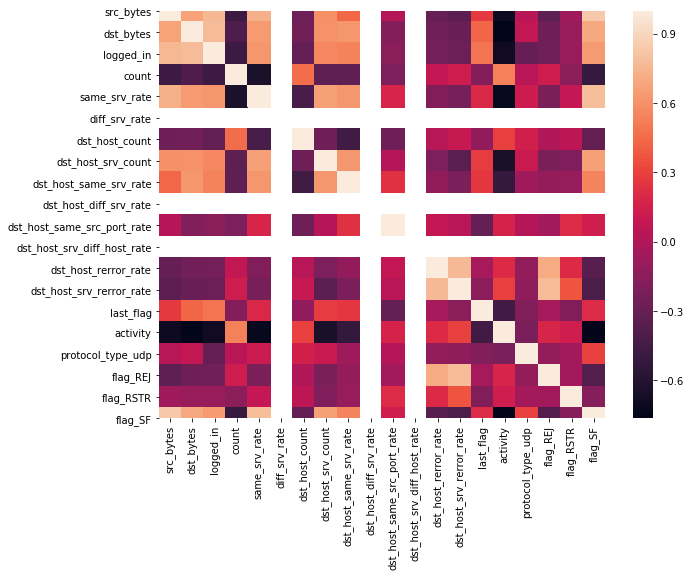

In [130]:
# graphical representation of correlation matrix using heatmap
sns.heatmap(train_final.corr())

In [131]:
# dropping some variables based on high correlation among independent variables using heatmap
train_final = train_final.drop(columns = ['diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate'])

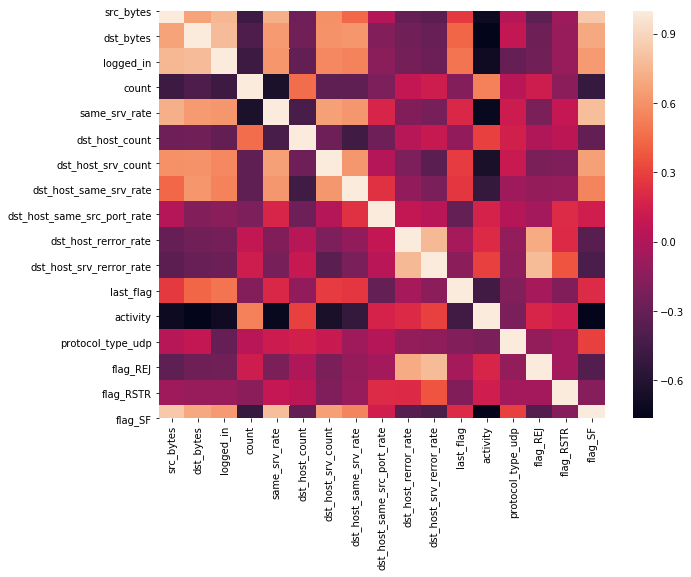

In [132]:
sns.heatmap(train_final.corr())

___

## ONE FINAL CONSOLIDATED TABLE

In [133]:
# first five rows of the final dataset
train_final.head()

,src_bytes,dst_bytes,logged_in,count,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,activity,protocol_type_udp,flag_REJ,flag_RSTR,flag_SF
0,3,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1
1,2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,2,0,1,1,0,0,0,0,1,1,0,0,0,0
3,2,3,1,1,1,0,2,1,0,0,0,2,0,0,0,0,1
4,2,2,1,2,1,1,2,1,0,0,0,2,0,0,0,0,1


In [134]:
# new shape of the final dataset
train_final.shape

(125973, 17)

In [135]:
# a concise summary of the final dataset
train_final.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 17 columns):
src_bytes                      int64
dst_bytes                      int64
logged_in                      int64
count                          int64
same_srv_rate                  int64
dst_host_count                 int64
dst_host_srv_count             int64
dst_host_same_srv_rate         int64
dst_host_same_src_port_rate    int64
dst_host_rerror_rate           int64
dst_host_srv_rerror_rate       int64
last_flag                      int64
activity                       int64
protocol_type_udp              int64
flag_REJ                       int64
flag_RSTR                      int64
flag_SF                        int64
dtypes: int64(17)
memory usage: 16.3 MB


___

## BINOMIAL CLASSIFICATION

- ### MODEL BUILDING

#### LOGISTIC REGRESSION TECHNIQUE

>Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. <br>

>In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name.

In [136]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split  

train, test = train_test_split(train_final, test_size = 0.3, random_state = 42)

In [137]:
# checking the shape of training and testing data to make sure about the division
print('Shape of training dataset', train.shape)
print('Shape of testing dataset', test.shape)

Shape of training dataset (88181, 17)
Shape of testing dataset (37792, 17)


In [138]:
# feature selection
feature_cols = train_final.columns.difference(['activity', 'logged_in', 'flag_SF', 'dst_host_srv_rerror_rate',
                                               'same_srv_rate', 'dst_bytes'])

In [139]:
# gathering features
my_formula = "activity ~" + "+".join(feature_cols)

In [140]:
# importing the required libraries for model building
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression

lm = sm.logit(formula = my_formula, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.150564
         Iterations 9


In [141]:
# summarizing the Regression Results
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               activity   No. Observations:                88181
Model:                          Logit   Df Residuals:                    88169
Method:                           MLE   Df Model:                           11
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                  0.7820
Time:                        15:39:47   Log-Likelihood:                -13277.
converged:                       True   LL-Null:                       -60894.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.8649      0.060     47.909      0.000       2.748       2.982
count                           1.2749      0.018     70.895      0.000       1.240       1.310
dst_host_count                  0.5936      0.055     10.856      0.000       0.486       0.701
dst_host_rerror_rate            1.1264      0.121      9.278      0.000       0.888       1.364
dst_host_same_src_port_rate     3.4333      0.059     58.575      0.000       3.318       3.548
dst_host_same_srv_rate         -1.4738      0.052    -28.309      0.000      -1.576      -1.372
dst_host_srv_count             -1.0791      0.026    -41.389      0.000      -1.130      -1.028
flag_REJ                       -1.0045      0.101     -9.922      0.000      -1.203      -0.806
flag_RSTR                       2.2887      0.184     12.453      0.000       1.928       2.649
last_flag                      -1.6938      0.026    -66.202      0.000      -1.744      -1.644
protocol_type_udp              -3.8975      0.052    -75.203      0.000      -3.999      -3.796
src_bytes                      -1.1147      0.016    -70.968      0.000      -1.146      -1.084
===============================================================================================
"""

- ### VARIATION INFLATION FACTOR (VIF)

>The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

In [142]:
# importing required libraries and funciton for variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [143]:
# getting y and X dataframes based on this regression:
y, X = dmatrices(my_formula, train ,return_type = 'dataframe')

# For each X, calculating VIF and save in dataframe
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF score'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [146]:
# inspecting VIF Factors
vif = vif.sort_values(['VIF score'], ascending = False)

# exporting vif
vif.to_csv('vif.csv', index=False)
vif

,features,VIF score
0,Intercept,15.710133
3,dst_host_rerror_rate,2.316149
7,flag_REJ,2.310770
6,dst_host_srv_count,2.280603
5,dst_host_same_srv_rate,2.157066
11,src_bytes,2.012801
1,count,1.690820
2,dst_host_count,1.574631
4,dst_host_same_src_port_rate,1.429102
9,last_flag,1.414925


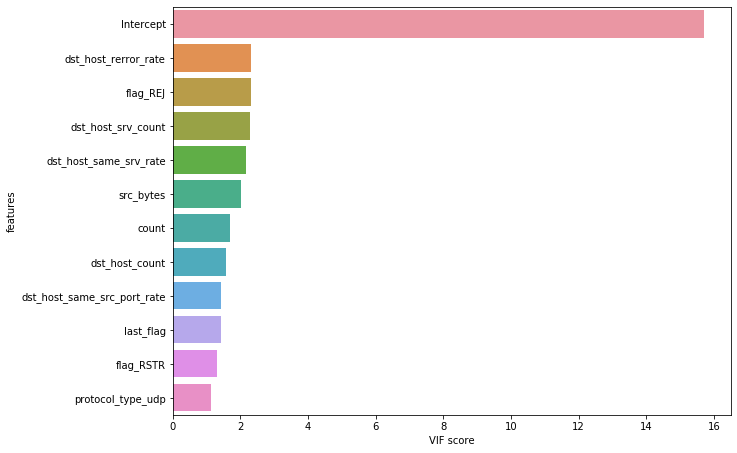

In [147]:
sns.barplot(x='VIF score', y='features', data=vif)

___

- ### PREDICTION

In [148]:
# predicting probabilities of whether the activity would be normal or attack
train['pred_prob'] = lm.predict(train)
test['pred_prob'] = lm.predict(test)

- ### CHECKING MODEL ACCURACY

##### ROC AUC SCORE

In [149]:
from sklearn.metrics import roc_auc_score, accuracy_score

print('roc_auc_score of training dataset:', roc_auc_score(train['activity'], train['pred_prob']))
print('roc_auc_score of testing dataset:', roc_auc_score(test['activity'], test['pred_prob']))

roc_auc_score of training dataset: 0.9851642673113847
roc_auc_score of testing dataset: 0.9858746768981459


> **ROC AUC SCORE** is coming out to be **good** in training and testing dataset. Hence, we can consider our model good.

In [150]:
print("Response rate (Proportion of 1 vs 0) in training dataset:", train['activity'].mean())
print("Average of predicted probalities in training dataset:", train['pred_prob'].mean())

Response rate (Proportion of 1 vs 0) in training dataset: 0.46405688300200726
Average of predicted probalities in training dataset: 0.4640568830019861


In [151]:
print("Response rate (Proportion of 1 vs 0) in testing dataset:", test['activity'].mean())
print("Average of predicted probalities in testing dataset:", test['pred_prob'].mean())

Response rate (Proportion of 1 vs 0) in testing dataset: 0.46859123624047416
Average of predicted probalities in testing dataset: 0.4696061971902643


- ### GETTING THE SOMER'S D VALUES FOR ALL THE X VARIABLES

>In statistics, Somers’ D is a measure of ordinal association between two possibly dependent random variables X and Y. Somers’ D takes values between -1 when all pairs of the variables disagree and 1 when all pairs of the variables agree. 
Somers’ D plays a central role in rank statistics and is the parameter behind many nonparametric methods.

In [152]:
# Bi-variate analysis to check the predictive power of each independent against dependent

# empty dataframe
somersd_df = pd.DataFrame()

# iterating for each of the X - dependant variables and get the Somer's D value
for num_variable in feature_cols:
    
    # executing the logit model
    logreg = sm.logit(formula = str('activity ~ ') + str(num_variable), data = train_final).fit()
    
    # getting the predicted probabilities and create a dataframe with the predicted values
    y_score = pd.DataFrame(logreg.predict())
    
    # naming the column of the df as score
    y_score.columns = ['Score']
    
    # calculating the Somer's D values
    somers_d = 2 * roc_auc_score(train_final['activity'], y_score) - 1
    
    # placing the variable name and the Somers' D score in a temp dataframe
    temp = pd.DataFrame([num_variable, somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    
    # appending the data in the dataframe for all the X variables
    somersd_df = pd.concat([somersd_df, temp], axis=0)
    
# printing the Somer's D values for all variables
somersd_df.sort_values(by = 'SomersD', ascending = False)

Optimization terminated successfully.
         Current function value: 0.531891
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.645257
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669239
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.675317
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.544370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.455590
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.673099
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.580800
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664989
  

,Variable Name,SomersD
0,src_bytes,0.79834
0,dst_host_srv_count,0.710625
0,count,0.597937
0,dst_host_same_srv_rate,0.508155
0,last_flag,0.504306
0,dst_host_count,0.255017
0,protocol_type_udp,0.14099
0,dst_host_rerror_rate,0.111195
0,flag_REJ,0.10567
0,dst_host_same_src_port_rate,0.0951084


## FOR CUTOFF

- ### KOLMOGOROV-SMIRNOV CHART

> Kolmogorov-Smirnov Chart will help us to understand how good our model is in differentiating the whether the **activity is going to be normal (AN) or attack (AA)**. K-S or Kolmogorov-Smirnov chart measures performance of classification models. More accurately, K-S is a measure of the degree of separation between the positive and negative distributions. The K-S is 100, if the scores partition the population into two separate groups in which one group contains all the positives and the other all the negatives.<br> <br>
On the other hand, If the model cannot differentiate between positives and negatives, then it is as if the model selects cases randomly from the population. The K-S would be 0. In most classification models the K-S will fall between 0 and 100, and that the higher the value the better the model is at separating the positive from negative cases.

##### TRAINING DATASET

In [153]:
# discretizing variable into 10 equal-sized buckets.
train['deciles'] = pd.qcut(train.pred_prob, 10, labels = False)

# deriving minimum & maximmum probability, number of ones & zeros and total count
min_prob = train.groupby(train.deciles)['deciles', 'pred_prob'].min().round(2).sort_index(ascending=False)['pred_prob']
max_prob = train.groupby(train.deciles)['deciles', 'pred_prob'].max().round(2).sort_index(ascending=False)['pred_prob']
total_count = train.groupby(train.deciles)['deciles', 'activity'].count().round(2).sort_index(ascending=False)['activity']
no_1s = train.groupby(train.deciles)['deciles', 'activity'].sum().round(2).sort_index(ascending=False)['activity']

# concatinating the derived variables
ks = pd.concat([min_prob, max_prob, no_1s, total_count - no_1s, total_count], axis = 1)
ks.columns = ['min_prob', 'max_prob', '#1s', '#0s', 'total']
ks = ks.reset_index() 

# finding the percentage of when the activity is normal(AN) and when the activity is of attack type (AA)
ks['perc_AN'] = round((ks['#1s'] * 100) / ks['#1s'].sum(), 2)
ks['perc_AA'] = round((ks['#0s'] * 100) / ks['#0s'].sum(), 2)

# deriving cumlative percentage of normal activity(AN) and attack activiy (AA)
ks['cum_perc_AN'] = ks.perc_AN.cumsum()
ks['cum_perc_AA'] = ks.perc_AA.cumsum()

# Perform the Kolmogorov-Smirnov test for goodness of fit.
ks['KS_Score'] = ks['cum_perc_AN'] - ks['cum_perc_AA']

# exporting ks file
ks.to_csv('ks_score.csv', index=False)
ks

,deciles,min_prob,max_prob,#1s,#0s,total,perc_AN,perc_AA,cum_perc_AN,cum_perc_AA,KS_Score
0,9,1.00,1.00,8372,1,8373,20.46,0.00,20.46,0.00,20.46
1,8,0.99,1.00,6665,28,6693,16.29,0.06,36.75,0.06,36.69
2,7,0.96,0.99,9435,182,9617,23.06,0.39,59.81,0.45,59.36
3,6,0.83,0.96,9454,480,9934,23.10,1.02,82.91,1.47,81.44
4,5,0.27,0.83,5525,3928,9453,13.50,8.31,96.41,9.78,86.63
5,4,0.04,0.26,820,6596,7416,2.00,13.96,98.41,23.74,74.67
6,3,0.01,0.04,381,9456,9837,0.93,20.01,99.34,43.75,55.59
7,2,0.01,0.01,250,8958,9208,0.61,18.95,99.95,62.70,37.25
8,1,0.00,0.01,19,8525,8544,0.05,18.04,100.00,80.74,19.26
9,0,0.00,0.00,0,9106,9106,0.00,19.27,100.00,100.01,-0.01


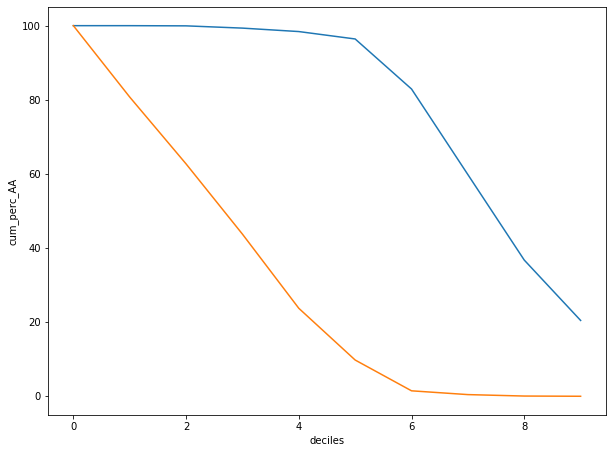

In [154]:
sns.lineplot(x='deciles', y='cum_perc_AN', data=ks, markers=True, dashes=False)
sns.lineplot(x='deciles', y='cum_perc_AA', data=ks, markers=True, dashes=False)
plt.show()

>We can see that the maximum separation that we receive is in the fifth decile. For a good model, the maximum K-S statistic should fall in the top five deciles as we expect the maximum differentiation between the activity is normal or attack is in the initial deciles only.<br>
> Hence, the **KS static** comes out to be **86.63%**.

##### TESTING DATASET

In [155]:
# discretizing variable into 10 equal-sized buckets.
test['deciles'] = pd.qcut(test.pred_prob, 10, labels = False)

# deriving minimum & maximmum probability, number of ones & zeros and total count
min_prob = test.groupby(test.deciles)['deciles', 'pred_prob'].min().round(2).sort_index(ascending=False)['pred_prob']
max_prob = test.groupby(test.deciles)['deciles', 'pred_prob'].max().round(2).sort_index(ascending=False)['pred_prob']
total_count = test.groupby(test.deciles)['deciles', 'activity'].count().round(2).sort_index(ascending=False)['activity']
no_1s = test.groupby(test.deciles)['deciles', 'activity'].sum().round(2).sort_index(ascending=False)['activity']

# concatinating the derived variables
ks_test = pd.concat([min_prob, max_prob, no_1s, total_count - no_1s, total_count], axis = 1)
ks_test.columns = ['min_prob', 'max_prob', '#1s', '#0s', 'total']
ks_test = ks_test.reset_index() 

# finding the percentage of when the activity is normal(AN) and when the activity is of attack type (AA)
ks_test['perc_AN'] = round((ks_test['#1s'] * 100) / ks_test['#1s'].sum(), 2)
ks_test['perc_AA'] = round((ks_test['#0s'] * 100) / ks_test['#0s'].sum(), 2)

# deriving cumlative percentage of normal activity(AN) and attack activiy (AA)
ks_test['cum_perc_AN'] = ks_test.perc_AN.cumsum()
ks_test['cum_perc_AA'] = ks_test.perc_AA.cumsum()

# Perform the Kolmogorov-Smirnov test for goodness of fit.
ks_test['KS_Score'] = round((ks_test['cum_perc_AN'] - ks_test['cum_perc_AA']), 2)
ks_test

,deciles,min_prob,max_prob,#1s,#0s,total,perc_AN,perc_AA,cum_perc_AN,cum_perc_AA,KS_Score
0,9,1.00,1.00,3534,4,3538,19.96,0.02,19.96,0.02,19.94
1,8,0.99,1.00,2913,10,2923,16.45,0.05,36.41,0.07,36.34
2,7,0.96,0.99,4071,79,4150,22.99,0.39,59.40,0.46,58.94
3,6,0.83,0.96,4163,216,4379,23.51,1.08,82.91,1.54,81.37
4,5,0.27,0.83,2423,1477,3900,13.68,7.35,96.59,8.89,87.70
5,4,0.04,0.27,362,3038,3400,2.04,15.13,98.63,24.02,74.61
6,3,0.01,0.04,161,3302,3463,0.91,16.44,99.54,40.46,59.08
7,2,0.01,0.01,78,3151,3229,0.44,15.69,99.98,56.15,43.83
8,1,0.00,0.01,4,5022,5026,0.02,25.01,100.00,81.16,18.84
9,0,0.00,0.00,0,3784,3784,0.00,18.84,100.00,100.00,-0.00


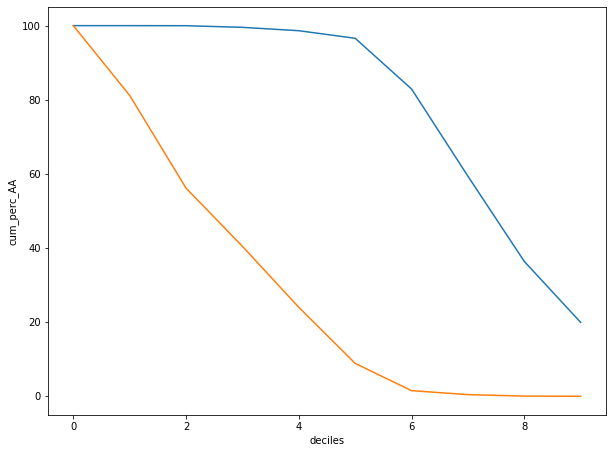

In [156]:
sns.lineplot(x='deciles', y='cum_perc_AN', data=ks_test, markers=True, dashes=False)
sns.lineplot(x='deciles', y='cum_perc_AA', data=ks_test, markers=True, dashes=False)
plt.show()

>We can see that the maximum separation that we receive is in the fifth decile. For a good model, the maximum K-S statistic should fall in the top five deciles as we expect the maximum differentiation between the activity is normal or attack is in the initial deciles only.<br>
> Hence, the **KS static** comes out to be **87.70%**.

- ### DOING THE FINAL PREDICTION AT 0.27 AS CUT-OFF

In [157]:
train['predicted'] = train['pred_prob'].apply(lambda x: 1 if x > 0.27 else 0)
test['predicted'] = test['pred_prob'].apply(lambda x: 1 if x > 0.27 else 0)

___

## FURTHER EVALUATION

- ### CONFUSION MATRIX

>Confusion matrix is one of the most powerful and commonly used evaluation technique as it allows us to compute a whole lot of other metrics that allow us to evaluate the performance of a classification model.

##### TRAINING DATASET

In [158]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train['activity'], train['predicted'])
cm

array([[43147,  4113],
       [ 1472, 39449]])

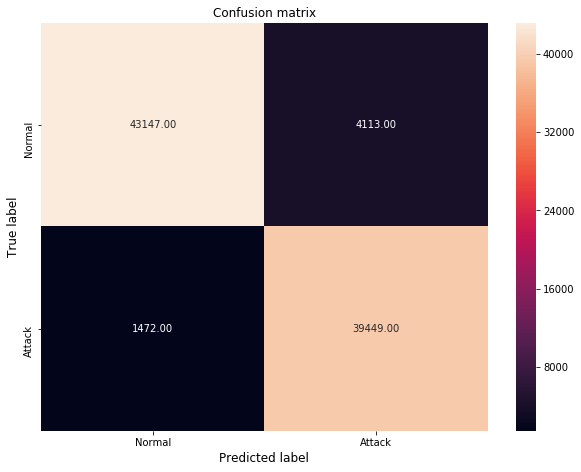

In [159]:
# Visualizing Confusion Matrix using Heatmap
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
plt.autoscale(enable=True, axis='y')

In [160]:
# Accuracy
accuracy_score(train['activity'], train['predicted'])

0.9366643608033477

>The **accuracy score** in training dataset for the logistic regression model comes out to be **0.93%**.

In [161]:
# precision and recall
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(train['activity'], train['predicted']))
print("Recall:",recall_score(train['activity'], train['predicted']))

Precision: 0.9055828474358386
Recall: 0.9640282495540187


In [162]:
# roc_auc_score
print('roc_auc_score of training dataset:', roc_auc_score(train['activity'], train['predicted']))

roc_auc_score of training dataset: 0.9384995246923712


#### ROC AUC Curve

>Another way to evaluate logistic regression is **ROC AUC Curve**. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

In [163]:
from sklearn.metrics import roc_curve

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(train['activity'], (train['pred_prob']))

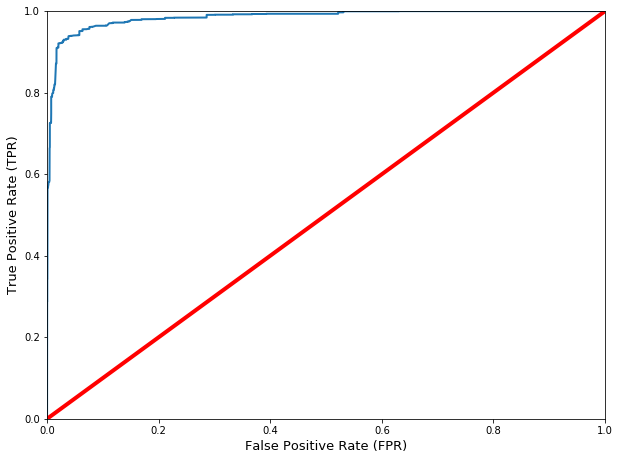

In [164]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=13)
    plt.ylabel('True Positive Rate (TPR)', fontsize=13)

plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

>The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our logistic regression model seems to do a good job.

##### TESTING DATASET

In [165]:
cm_test = confusion_matrix(test['activity'], test['predicted'])
cm_test

array([[18301,  1782],
       [  605, 17104]])

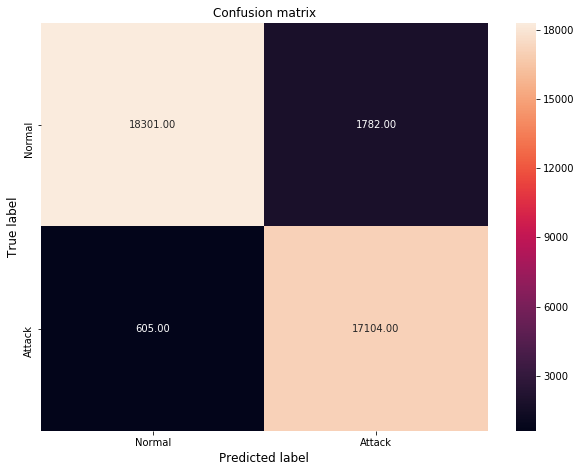

In [166]:
# Visualizing Confusion Matrix using Heatmap
sns.heatmap(cm_test, annot=True, fmt='.2f', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
plt.autoscale(enable=True, axis='y')

In [167]:
# Accuracy
accuracy_score(test['activity'], test['predicted'])

0.936838484335309

>The **accuracy score** in testing dataset for the logistic regression model comes out to be **0.93%** as well.

In [168]:
# precision and recall
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(test['activity'], test['predicted']))
print("Recall:",recall_score(test['activity'], test['predicted']))

Precision: 0.9056443926718204
Recall: 0.9658365802699193


In [169]:
# roc_auc_score
print('roc_auc_score of testing dataset:', roc_auc_score(test['activity'], test['predicted']))

roc_auc_score of testing dataset: 0.9385524085435639


#### ROC AUC Curve

>Another way to evaluate logistic regression is ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

In [170]:
from sklearn.metrics import roc_curve

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(test['activity'], (test['pred_prob']))

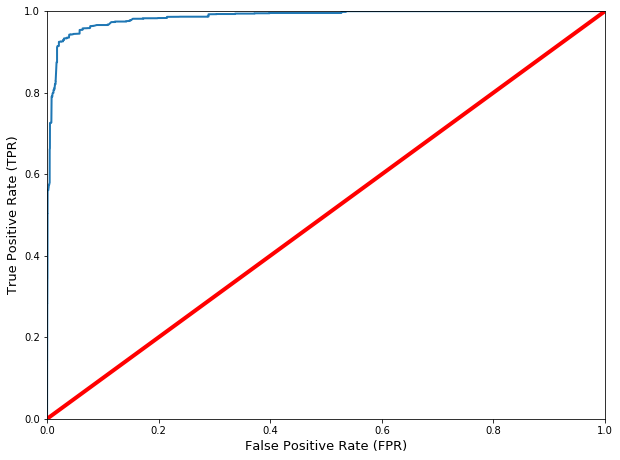

In [171]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=13)
    plt.ylabel('True Positive Rate (TPR)', fontsize=13)

plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

___

<center> <h3> HENCE, WE BUILT A NETWORK INTRUSION DETECTION SYSTEM TO DETECT ATTACKS IN THE NETWORK.

___

#### APPLYING THIS MODEL ON NEW TESTING DATASET TO PREDICT WHETHER THE ACTIVITY IS NORMAL OR ATTACK

In [172]:
# new testing dataset
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [173]:
# splitting continous and categorical variables to get better clarity of the training dataset.
test_df_conti_vars = test_df.loc[:, (test_df.dtypes == 'float64') | (test_df.dtypes == 'int64') | (test_df.dtypes == 'float32') | (test_df.dtypes == 'int32')]
test_df_cat_vars = test_df.loc[:, test_df.dtypes == 'object']

# standardizing the variables
data = ['dst_bytes', 'src_bytes', 'duration', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'last_flag']
fs_df = test_df_conti_vars.copy()

for scale_cols in data:
    fs_df.loc[(fs_df[scale_cols] <= fs_df[scale_cols].quantile(.25)), scale_cols] = 0
    fs_df.loc[(fs_df[scale_cols] > fs_df[scale_cols].quantile(.25)) & (fs_df[scale_cols] <= fs_df[scale_cols].quantile(.50)), scale_cols] = 1
    fs_df.loc[(fs_df[scale_cols] > fs_df[scale_cols].quantile(.50)) & (fs_df[scale_cols] <= fs_df[scale_cols].quantile(.75)), scale_cols] = 2
    fs_df.loc[(fs_df[scale_cols] > fs_df[scale_cols].quantile(.75)) & (fs_df[scale_cols] <= fs_df[scale_cols].quantile(.95)), scale_cols] = 3
    fs_df.loc[(fs_df[scale_cols] > fs_df[scale_cols].quantile(.95)), scale_cols] = 4
    
test_df_conti_vars = fs_df.copy()

# Creating dummy variables for training dataset
for c_feature in ['protocol_type', 'flag']:
    test_df_cat_vars[c_feature] = test_df_cat_vars[c_feature].astype('category')
    test_df_cat_vars = create_dummies(test_df_cat_vars, c_feature)
    
test_df_cat_vars = test_df_cat_vars.drop(['attack', 'service'], axis=1)

# concatinating continous and categorical variables to get the final dataset
test_final = pd.concat([test_df_conti_vars, test_df_cat_vars], axis=1)

# coverting all the features to int data type
for col in test_final:
    test_final[col] = test_final[col].astype(int)
    

In [174]:
# predicting probability
test_final['prob'] = lm.predict(test_final)

In [175]:
# doing the final prediction at 0.27 as cutoff
test_final['activity'] = test_final['prob'].apply(lambda x: 1 if x > 0.27 else 0)

In [176]:
test_final.to_csv('submission.csv', index=False)

In [177]:
# the count of observations of each activity
test_final.activity.value_counts()

1    12422
0    10122
Name: activity, dtype: int64

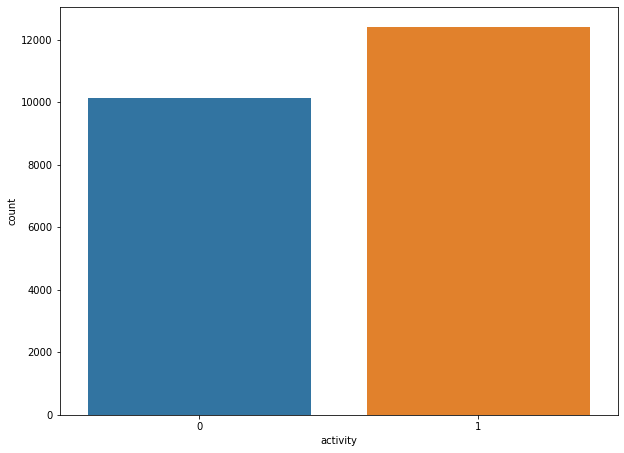

In [178]:
# the graphical representation of the count of observations of each activity using bars.
sns.countplot(test_final.activity)
plt.show()

> From the above graph we can see that **45%** of activities are **normal** whereas **56%** are of **attack type** in the final testing dataset.

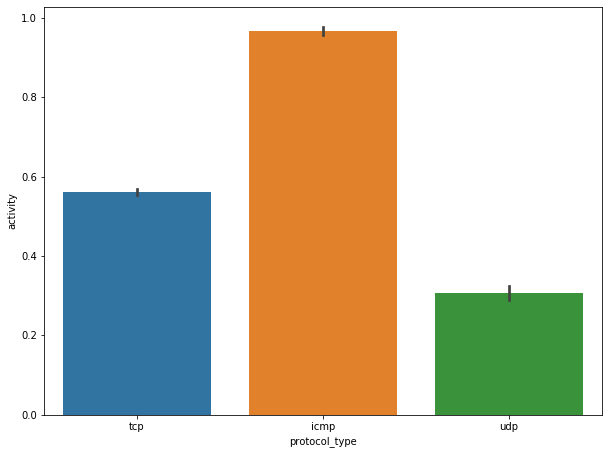

In [179]:
# the graphical representation of the count of observations of each activity by protocol_type.
sns.barplot(x=test_df.protocol_type, y=test_final.activity)

- ### FACTORS AFFECTING THE ACTIVITY

- **dst_host_rerror_rate** : The percentage of connections that have activated the flag (4) REJ, among the connections (32) aggregated in dst_host_count
- **flag_REJ** : Status of the connection REJ
- **dst_host_srv_count** : Number of connections having the same port number
- **dst_host_same_srv_rate** : The percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32)
- **src_bytes** : Number of data bytes transferred from source to destination in single connection
- **count** : Number of connections to the same destination host as the current connection in the past two
seconds
- **dst_host_count** : Number of connections having the same destination host IP address
- **dst_host_same_src_port_rate**: Percent of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount(33)
- **flag_RSTR** : Status of the connection RSTR
- **protocol_type_udp** : Protocol used in the connection UDP
- **last_flag**

- ### THE RECOMMENDATIONS

1. The organizations should ensure that all intrusion detection and provision system components are secured appropriately because these systems are often targeted by attackers who want to prevent them from detecting attacks or want to gain access to sensitive information in the intrusion detection and prevention system, such as host configurations and known vulnerabilities.<br><br>

2. The organizations planning to use multiple types of intrusion detection and prevention technologies or multiple products of the same technology type should consider whether or not the systems should be integrated. Direct intrusion detection and prevention system integration most often occurs when an organization uses multiple products from a single vendor, by having a single console that can be used to manage and monitor the multiple products. Some products can also mutually share data, which can speed the analysis process and help users to better prioritize threats.<br><br>

3. Before evaluating intrusion detection and prevention products, organizations should define the requirements that the products should meet. Evaluators must understand the characteristics of the organization's system and network environments, so that a compatible intrusion detection and prevention system can be selected that can monitor the events of interest on the systems and/or networks.<br><br>

4. When evaluating intrusion detection and prevention products, organizations should consider using a combination of several sources of data on the products' characteristics and capabilities. Common product data sources include test lab or real-world product testing, vendor-provided information, third-party product reviews and previous experience from individuals within the organization and trusted individuals at other organizations.

<center> <h1> END

___